# <center> Harmony & Healing: Unveiling the Impact of Music on Mental Health

![](mxh.jpg)

**BY:** <br> 
`Baguio`, Christian Jay <br>
`Bandivas`, Roxanne Mae <br>
`Barrio`, Reyjane Mae <br>
`Palmes`, Jhibsam <br>
`Sabacajan`, Cle Michael <br>
`Tapao`, Mark Vincent

**Course:** Machine Learning <br/>
**Program & Section:** BS in Data Science - DS3A

# **🎧Introduction**
In the field of mental health, the healing power of music is increasingly recognized and accepted. Music therapy (MT) stands for Light of Hope, which uses rhyme, melody, and harmony as tools for emotional expression, stress reduction, and mood enhancement. The machine model derived from Music and Mental Health (MxMH) aims to predict the possible effects of certain music on the psyche of each individual by analyzing, through machine learning algorithms, the complex interactions between musical genres, emotional responses, and mental health outcomes. The target variable for our study is the music effect, described as 'Does music improve/worsen the respondent's mental health conditions?'. This approach allows us to identify specific therapeutic targets by predicting significant trends in music preferences and psychological resilience. Ultimately, our research aims to enhance the application of music therapy, offering personalized musical interventions to improve mental health outcomes.


# `🎧About the Dataset`
Music & Mental Health Survey (CC0: Public Domain) <a href="https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results?select=mxmh_survey_results.csv">Dataset</a>
### `🎧Features and Attributes`
* Age = Respondent's Age
* Primary streaming service = Respondent's primary streaming service
* Hours per day = Number of hours the respondent listens to music per day
* While working = Does the respondent listen to music while studying/working?
* Instrumentalist = Does the respondent play an instrument regularly?
* Composer = Does the respondent compose music?
* Exploratory = Does the respondent actively explore new artists/genres?
* Foreign languages = Does the respondent regularly listen to music with lyrics in a language they are not fluent in?
* Fav genre = Respondent's favorite or top genre
* BPM = Beats per minute of favorite genre
* Respondents rank how often they listen to 16 music genres, where they can select: Never, Rarely, Sometimes, Very, frequently
* Respondents rank Anxiety, Depression, Insomnia, and OCD on a scale of 0 to 10, where:
    * 0 - I do not experience this.
    * 10 - I experience this regularly, constantly/or to an extreme.
* Music effects = Does music improve/worsen respondent's mental health conditions?

| Feature                        | Data Type      | Definition                                                          |
|--------------------------------|----------------|---------------------------------------------------------------------|
| Timestamp                      | object         | Date and time when form was submitted                               |
| Age                            | float64        | Respondent's age                                                    |
| Primary streaming service      | object         | Respondent's primary streaming service                              |
| Hours per day                  | float64        | Number of hours the respondent listens to music per day             |
| While working                  | object         | Does the respondent listen to music while studying/working?         |
| Instrumentalist                | object         | Does the respondent play an instrument regularly?                   |
| Composer                       | object         | Does the respondent compose music?                                  |
| Fav genre                      | object         | Respondent's favorite or top genre                                  |
| Exploratory                    | object         | Does the respondent actively explore new artists/genres?            |
| Foreign languages              | object         | Respondent regularly listen to musicthey are not fluent in?         |
| BPM                            | float64        | Beats per minute of favorite genre                                  |
| Frequency [Classical]          | object         | How frequently the respondent listens to classical music            |
| Frequency [Country]            | object         | How frequently the respondent listens to country music              |
| Frequency [EDM]                | object         | How frequently the respondent listens to EDM music                  |
| Frequency [Folk]               | object         | How frequently the respondent listens to folks music                |
| Frequency [Gospel]             | object         | How frequently the respondent listens to Gospel music               |
| Frequency [Hip hop]            | object         | How frequently the respondent listens to hip hop music              |
| Frequency [Jazz]               | object         | How frequently the respondent listens to jazz music                 |
| Frequency [K pop]              | object         | How frequently the respondent listens to K pop music                |
| Frequency [Latin]              | object         | How frequently the respondent listens to Latin music                |
| Frequency [Lofi]               | object         | How frequently the respondent listens to lofi music                 |
| Frequency [Metal]              | object         | How frequently the respondent listens to metal music                |
| Frequency [Pop]                | object         | How frequently the respondent listens to pop music                  |
| Frequency [R&B]                | object         | How frequently the respondent listens to R&B music                  |
| Frequency [Rap]                | object         | How frequently the respondent listens to rap music                  |
| Frequency [Rock]               | object         | How frequently the respondent listens to rock music                 |
| Frequency [Video game music]   | object         | How frequently the respondent listens to video game music           |
| Anxiety                        | float64        | Self-reported anxiety, on a scale of 0-10                           |
| Depression                     | float64        | Self-reported depression, on a scale of 0-10                        |
| Insomnia                       | float64        | Self-reported insomnia, on a scale of 0-10                          |
| OCD                            | float64        | Self-reported OCD, on a scale of 0-10                               |
| Music effects                  | object         | Does music improve/worsen respondent's mental health conditions?    |
| Permissions                    | object         | Permissions to publicize data                                       |


## `🔃Import Necessary Libraries`


In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split as tts, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from collections import Counter
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import Ridge, Lasso, LogisticRegression, LinearRegression
from tabulate import tabulate
from sklearn.svm import LinearSVC
from sklearn.base import TransformerMixin
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import roc_curve, auc
import shap

import warnings
warnings.filterwarnings("ignore")

In [77]:
df = pd.read_csv('mxmh.csv')
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


## `🔎Data Understanding`

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [78]:
cols = [col.replace(" ", "_").replace("[", "").replace("]", "") for col in df.columns]
df.columns = cols

In [79]:
num = df.select_dtypes(include='float64')
cat = df.select_dtypes(include='object')

# Create a SimpleImputer specifying strategies
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

num_imputer.fit(num)
cat_imputer.fit(cat)

num_imputed = num_imputer.transform(num)
cat_imputed = cat_imputer.transform(cat)

df = pd.concat([pd.DataFrame(num_imputed, columns=num.columns), 
                        pd.DataFrame(cat_imputed, columns=cat.columns)], axis=1)

#Fill each attributes with nan values with their mean values
df.isna().sum()

Age                           0
Hours_per_day                 0
BPM                           0
Anxiety                       0
Depression                    0
Insomnia                      0
OCD                           0
Timestamp                     0
Primary_streaming_service     0
While_working                 0
Instrumentalist               0
Composer                      0
Fav_genre                     0
Exploratory                   0
Foreign_languages             0
Frequency_Classical           0
Frequency_Country             0
Frequency_EDM                 0
Frequency_Folk                0
Frequency_Gospel              0
Frequency_Hip_hop             0
Frequency_Jazz                0
Frequency_K_pop               0
Frequency_Latin               0
Frequency_Lofi                0
Frequency_Metal               0
Frequency_Pop                 0
Frequency_R&B                 0
Frequency_Rap                 0
Frequency_Rock                0
Frequency_Video_game_music    0
Music_ef

## ❔Question ponder

* What Primary Streaming Service has a highest number stream?
* What Fav_genre has a highest number of Hours per day?

* Top 10 Favourite Genre

Text(0, 0.5, '')

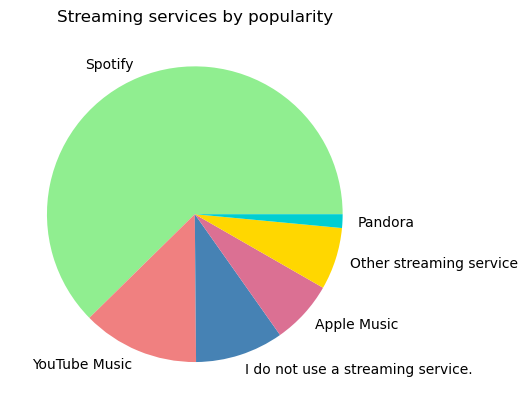

In [5]:
s_colors = ['lightgreen', 'lightcoral', 'steelblue', 'palevioletred', 'gold', 'darkturquoise']

services = df['Primary_streaming_service'].value_counts()
services.plot(kind='pie', colors = s_colors)

plt.title('Streaming services by popularity')
plt.ylabel("")

Text(0.5, 0, 'Hours_per_day')

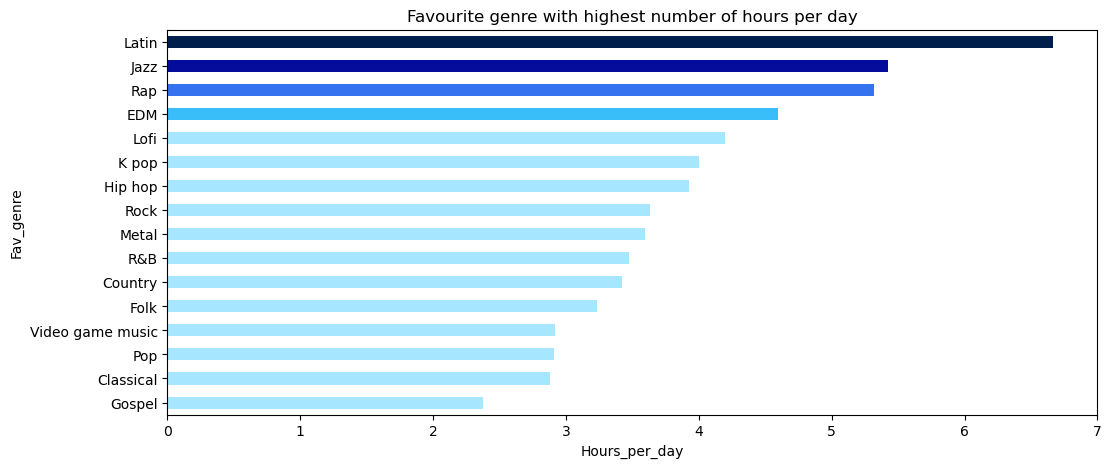

In [6]:
axis = df.query('Fav_genre != "Other"').groupby('Fav_genre')['Hours_per_day'].agg(['mean']) \
       .sort_values('mean')['mean'].plot(kind = 'barh', figsize = (12, 5), title = 'Favourite genre with highest number of hours per day',
                                        color = ['#A7E6FF', '#A7E6FF','#A7E6FF', '#A7E6FF','#A7E6FF', '#A7E6FF','#A7E6FF', '#A7E6FF','#A7E6FF', '#A7E6FF','#A7E6FF', '#A7E6FF', '#3ABEF9', '#3572EF', '#050C9C', '#011f4b'])
axis.set_xlabel('Hours_per_day')

Text(0, 0.5, 'Fav_genre')

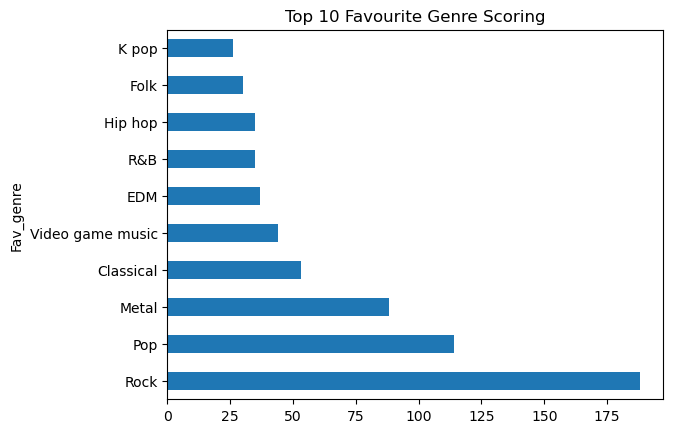

In [7]:
ax = df["Fav_genre"].value_counts().head(10).plot(kind = "barh", title ="Top 10 Favourite Genre Scoring")
ax.set_ylabel('Fav_genre')

## `Data Preprocessing`

In [80]:
columns_to_drops = ['Timestamp', 'Primary_streaming_service', 'Fav_genre', 'Permissions']

df.drop(columns=columns_to_drops, inplace=True)

In [6]:
# Print unique values for each object column to check which is ordinal and nominal
for col in df.select_dtypes(include='object'):
    print(f"Column: {col}")
    print(f"Unique Values:\n {df[col].unique()}")
    print("\n")

Column: While_working
Unique Values:
 ['Yes' 'No']


Column: Instrumentalist
Unique Values:
 ['Yes' 'No']


Column: Composer
Unique Values:
 ['Yes' 'No']


Column: Exploratory
Unique Values:
 ['Yes' 'No']


Column: Foreign_languages
Unique Values:
 ['Yes' 'No']


Column: Frequency_Classical
Unique Values:
 ['Rarely' 'Sometimes' 'Never' 'Very frequently']


Column: Frequency_Country
Unique Values:
 ['Never' 'Sometimes' 'Very frequently' 'Rarely']


Column: Frequency_EDM
Unique Values:
 ['Rarely' 'Never' 'Very frequently' 'Sometimes']


Column: Frequency_Folk
Unique Values:
 ['Never' 'Rarely' 'Sometimes' 'Very frequently']


Column: Frequency_Gospel
Unique Values:
 ['Never' 'Sometimes' 'Rarely' 'Very frequently']


Column: Frequency_Hip_hop
Unique Values:
 ['Sometimes' 'Rarely' 'Never' 'Very frequently']


Column: Frequency_Jazz
Unique Values:
 ['Never' 'Very frequently' 'Rarely' 'Sometimes']


Column: Frequency_K_pop
Unique Values:
 ['Very frequently' 'Rarely' 'Sometimes' 'Never']


Col

In [81]:
nominal_cols = ['While_working', 'Instrumentalist', 'Composer', 'Exploratory', 'Foreign_languages']
ordinal_cols = ['Frequency_Classical', 'Frequency_Country', 'Frequency_EDM', 'Frequency_Folk', 'Frequency_Gospel', 'Frequency_Hip_hop',
               'Frequency_Jazz', 'Frequency_K_pop', 'Frequency_Latin', 'Frequency_Lofi', 'Frequency_Metal', 'Frequency_Pop', 'Frequency_R&B', 'Frequency_Rap',
               'Frequency_Rock', 'Frequency_Video_game_music', 'Music_effects']


ordinal_encoder = OrdinalEncoder(categories=[df[col].unique() for col in ordinal_cols])
df[ordinal_cols] = ordinal_encoder.fit_transform(df[ordinal_cols])

ohe = OneHotEncoder()
df_nominal_encoded = pd.DataFrame(ohe.fit_transform(df[nominal_cols]).toarray(), 
                                  columns=ohe.get_feature_names_out(nominal_cols))

df = pd.concat([df, df_nominal_encoded], axis=1).drop(columns=nominal_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         736 non-null    float64
 1   Hours_per_day               736 non-null    float64
 2   BPM                         736 non-null    float64
 3   Anxiety                     736 non-null    float64
 4   Depression                  736 non-null    float64
 5   Insomnia                    736 non-null    float64
 6   OCD                         736 non-null    float64
 7   Frequency_Classical         736 non-null    float64
 8   Frequency_Country           736 non-null    float64
 9   Frequency_EDM               736 non-null    float64
 10  Frequency_Folk              736 non-null    float64
 11  Frequency_Gospel            736 non-null    float64
 12  Frequency_Hip_hop           736 non-null    float64
 13  Frequency_Jazz              736 non

## `🔎Feature Understanding`

In [ ]:
df.describe().T

In [82]:
#IQR
Q1 = df['BPM'].quantile(0.25)
Q3 = df['BPM'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Replace outliers with median
df.loc[df['BPM'] < lower_bound, 'BPM'] = df['BPM'].median()
df.loc[df['BPM'] > upper_bound, 'BPM'] = df['BPM'].median()

In [83]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,736.0,25.206803,12.046766,10.0,18.00,21.0,28.0,89.0
Hours_per_day,736.0,3.572758,3.028199,0.0,2.00,3.0,5.0,24.0
BPM,736.0,124.274457,29.706559,20.0,105.00,128.0,140.0,220.0
Anxiety,736.0,5.837636,2.793054,0.0,4.00,6.0,8.0,10.0
Depression,736.0,4.796196,3.028870,0.0,2.00,5.0,7.0,10.0
Insomnia,736.0,3.738451,3.088689,0.0,1.00,3.0,6.0,10.0
OCD,736.0,2.637228,2.842017,0.0,0.00,2.0,5.0,10.0
Frequency_Classical,736.0,1.171196,1.068045,0.0,0.00,1.0,2.0,3.0
Frequency_Country,736.0,1.233696,1.321617,0.0,0.00,1.0,3.0,3.0
Frequency_EDM,736.0,1.254076,1.055912,0.0,0.00,1.0,2.0,3.0


Above, we have a table showing the descriptive analysis of the attributes and its instances of the dataset used. Let us examine the attributes one by one.

1. Age: <br>
    > The average percentage age is 2.5. The standard deviation is at 1.2. The minimum is 10 while the maximum is at 89.0. 25% of age rated 18.0, 50% of age rated 21.0, and 75% of the age rated 28.0.
<br>
2. Hours per day: <br>
    > The average percentage of Hours per day is 3.5. The standard deviation is at 3.0. The minimum is 0 while the maximum is at 24.0. 25% of Hours per day rated 2.0, 50% of Hours per day rated 3.0, and 75% of the Hours per day rated 5.0.
<br>
3. BPM: <br>
    > The average percentage of BPM is 124.27. The standard deviation is at 29.70. The minimum is 20 while the maximum is at 220.0. 25% of BPM rated 105.0, 50% of BPM rated 128.0, and 75% of the BPM rated 140.0.
<br>
4. Anxiety: <br>
    > The average percentage of Anxiety is 5.8. The standard deviation is at 2.7. The minimum is 0 while the maximum is at 10.0. 25% of Anxiety rated 4.0, 50% of Anxiety rated 6.0, and 75% of the Anxiety rated 8.0.
5. Depression: <br>
    > The average percentage of Depression is 4.7. The standard deviation is at 3.0. The minimum is 0 while the maximum is at 10.0. 25% of Depression rated 2.0, 50% of Depression rated 5.0, and 75% of the Depression rated 7.0.
6. Insomnia: <br>
    > The average percentage of Insomnia is 3.7. The standard deviation is at 3.0. The minimum is 0 while the maximum is at 10.0. 25% of Insomnia rated 1.0, 50% of Insomnia rated 3.0, and 75% of the Insomnia rated 6.0.
7. OCD: <br>
    > The average percentage of OCD is 2.6. The standard deviation is at 2.8. The minimum is 0 while the maximum is at 10.0. 25% of OCD rated 0.0, 50% of OCD rated 2.0, and 75% of the OCD rated 5.0.

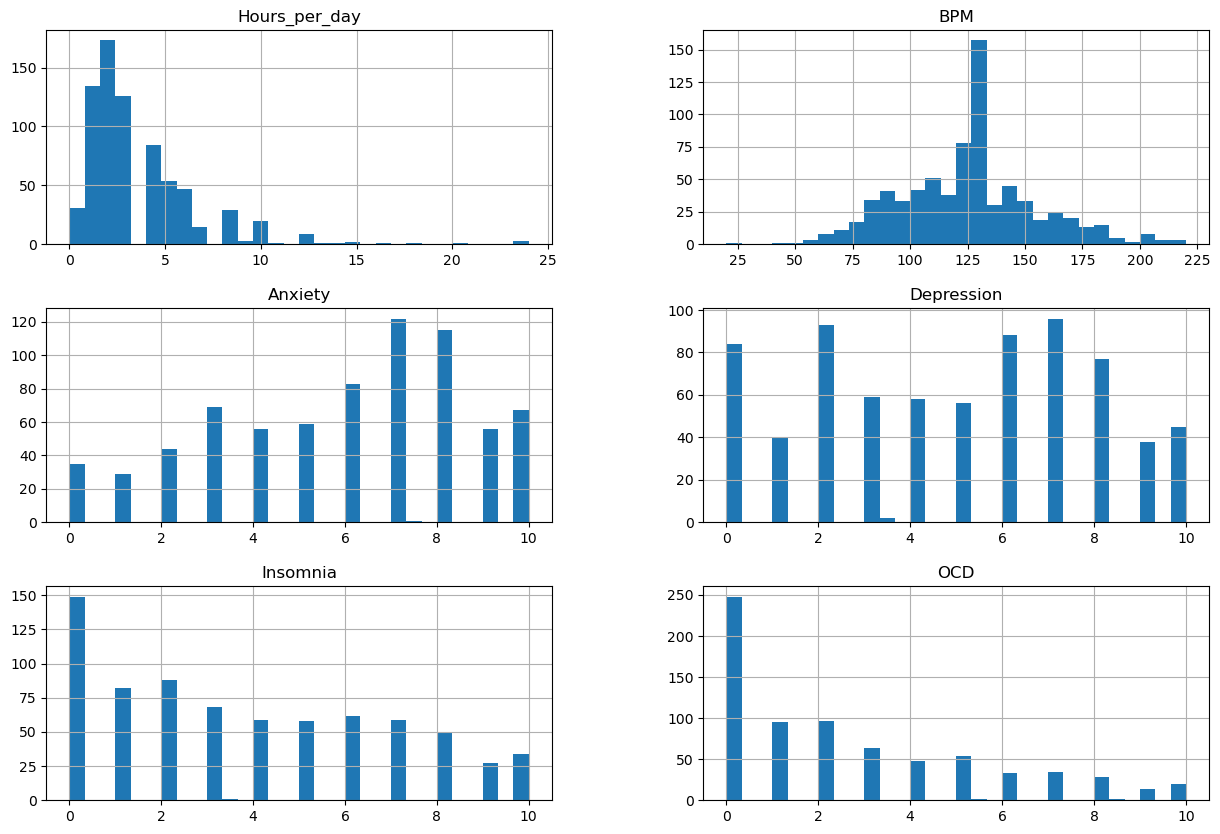

In [10]:
numerical_cols = ['Hours_per_day', 'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD']
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.show()

## `🔎Check Multicollinearity`

In [84]:
X = add_constant(df)

# Calculating VIF for each feature
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

                      Variable       VIF
0                        const  0.000000
1                          Age  1.273266
2                Hours_per_day  1.210126
3                          BPM  1.083484
4                      Anxiety  1.606425
5                   Depression  1.584332
6                     Insomnia  1.262494
7                          OCD  1.215911
8          Frequency_Classical  1.116505
9            Frequency_Country  1.191911
10               Frequency_EDM  1.071963
11              Frequency_Folk  1.228592
12            Frequency_Gospel  1.171411
13           Frequency_Hip_hop  1.200929
14              Frequency_Jazz  1.155123
15             Frequency_K_pop  1.285773
16             Frequency_Latin  1.076004
17              Frequency_Lofi  1.156079
18             Frequency_Metal  1.213846
19               Frequency_Pop  1.267950
20               Frequency_R&B  1.075349
21               Frequency_Rap  1.236806
22              Frequency_Rock  1.072977
23  Frequency_Vi

In [85]:
columns_to_drop = ['While_working_No', 'While_working_Yes', 'Instrumentalist_No', 'Instrumentalist_Yes', 'Composer_No', 'Composer_Yes',
                  'Exploratory_No', 'Exploratory_Yes', 'Foreign_languages_No', 'Foreign_languages_Yes']

df.drop(columns=columns_to_drop, inplace=True)

<Axes: >

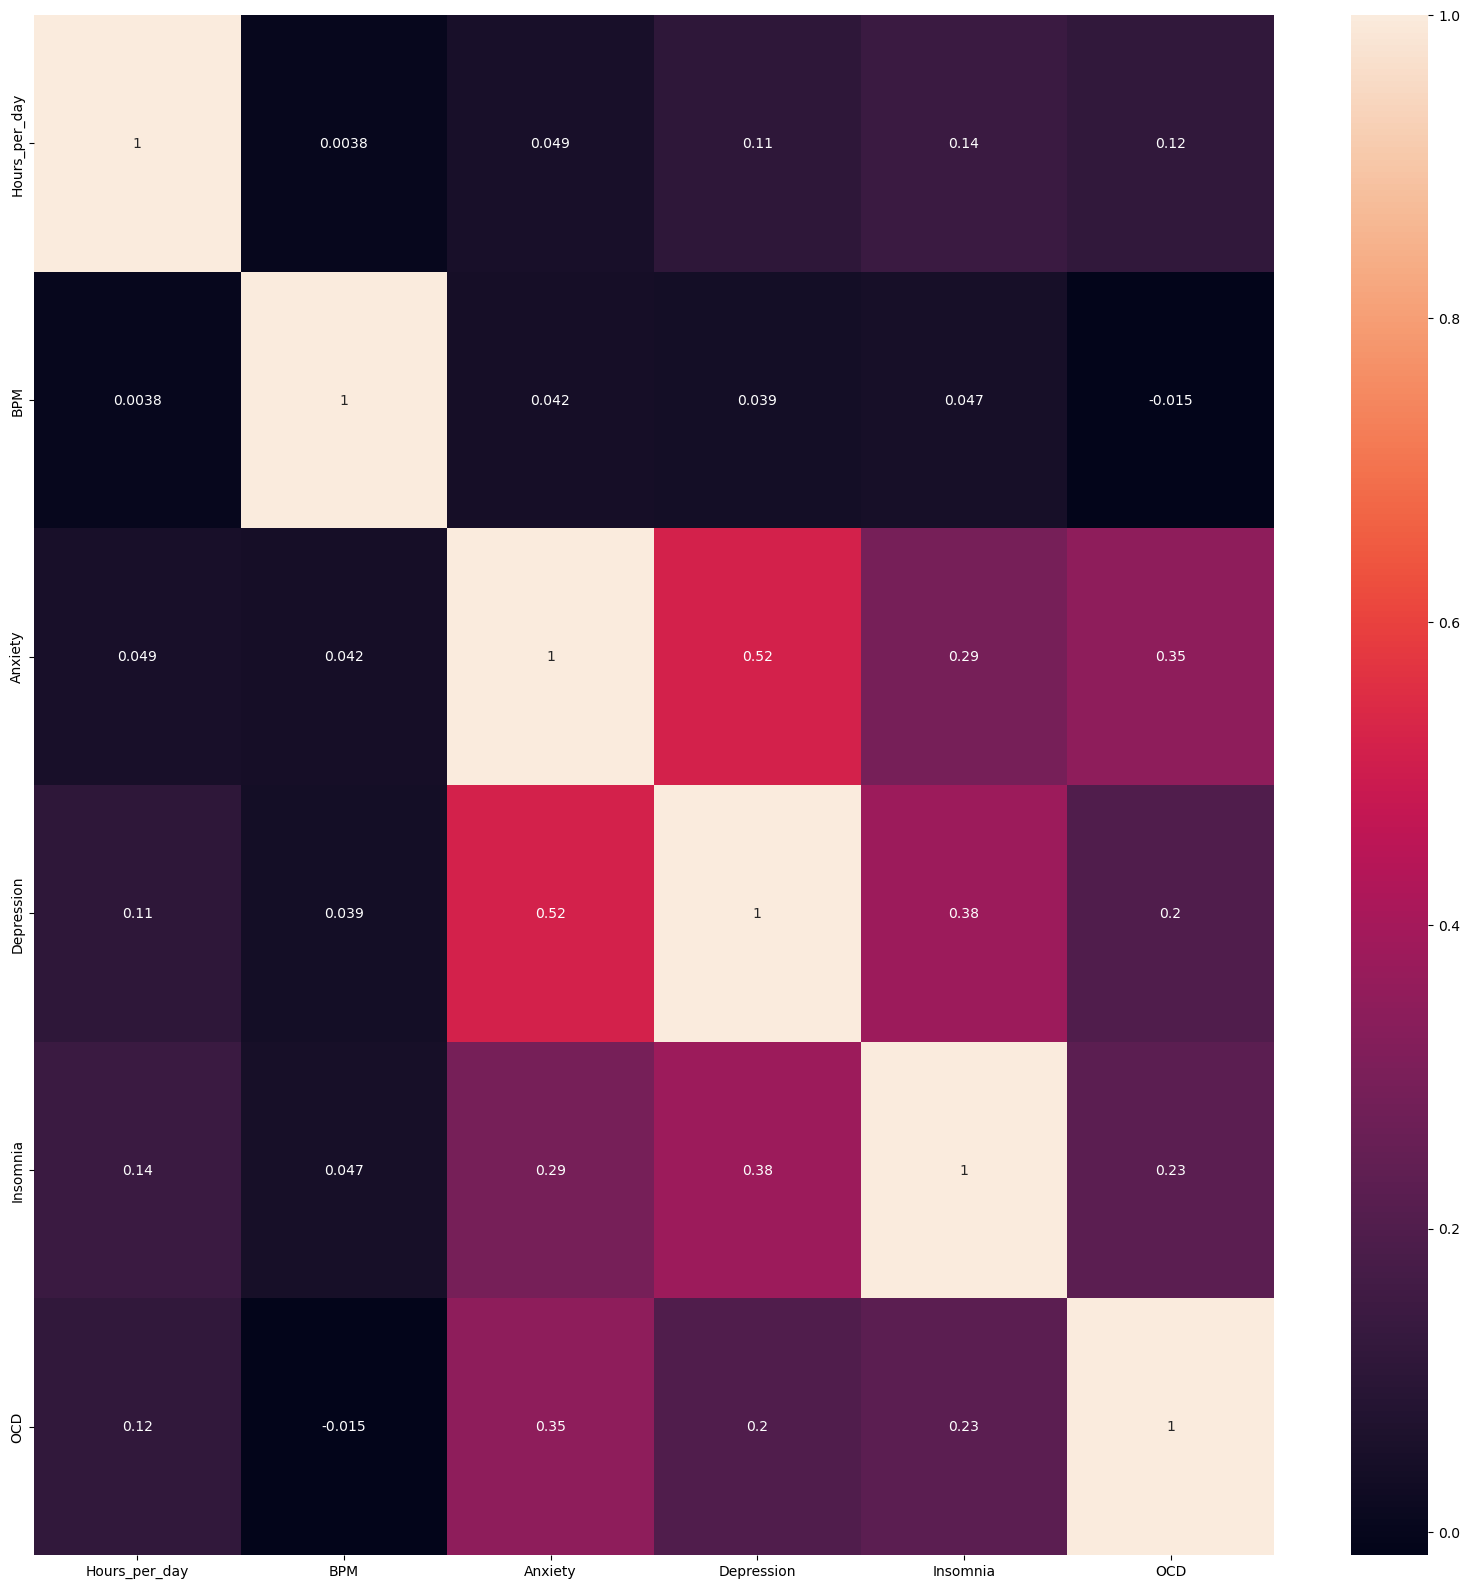

In [13]:
#check for data correlations
plt.figure(figsize=(20,20))
cq_corr = df[numerical_cols].corr(method='pearson')
sns.heatmap(cq_corr, annot = True)

<Axes: >

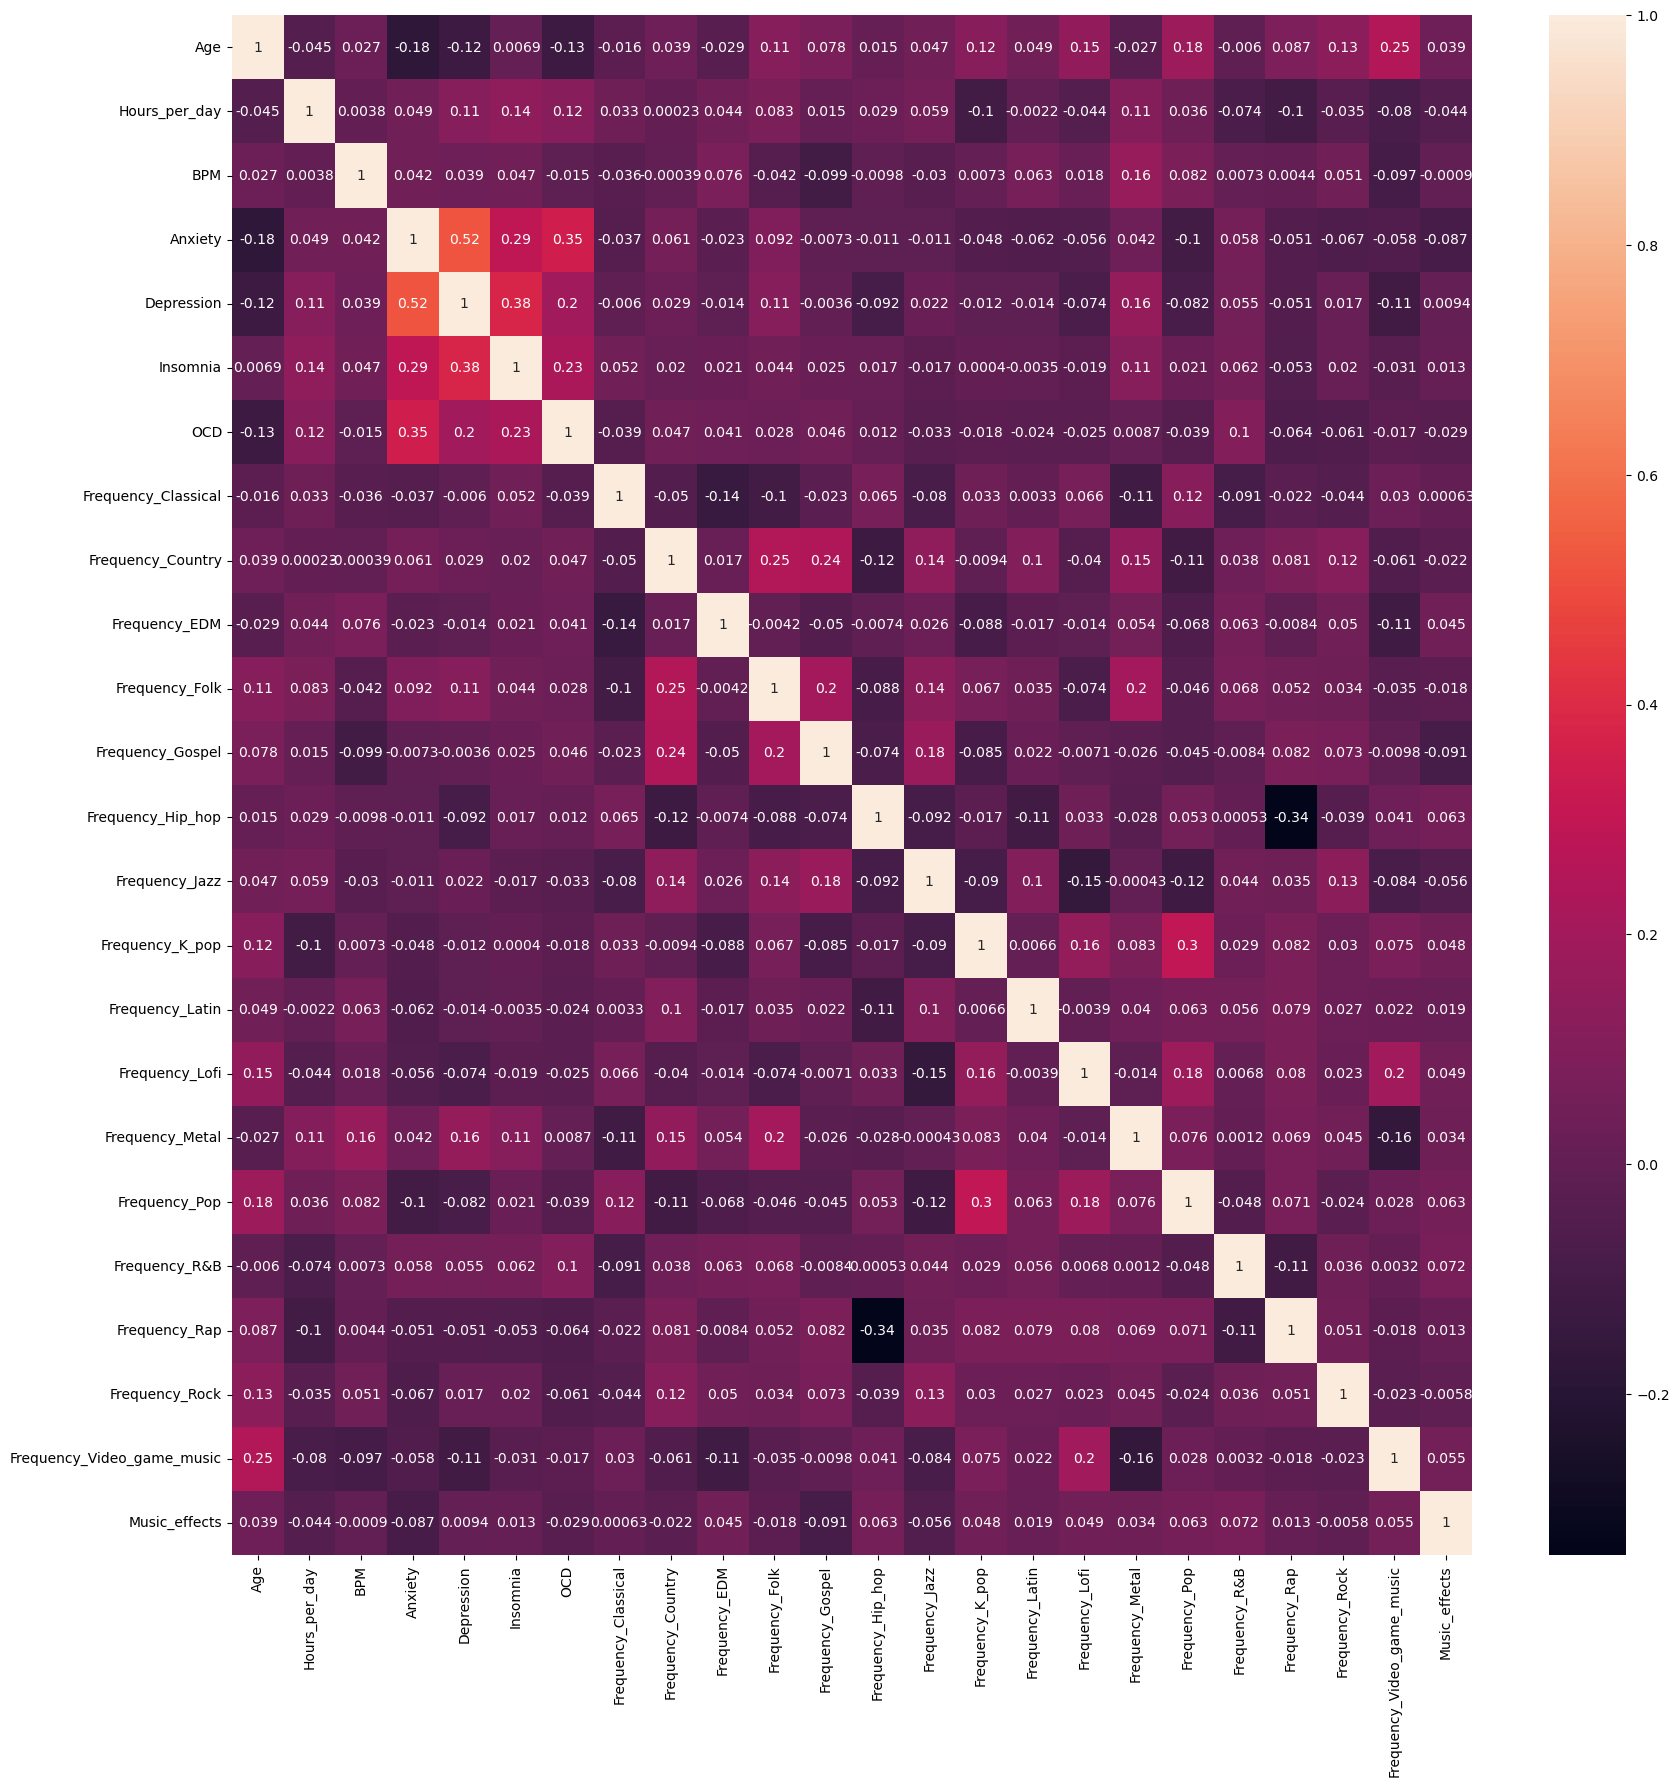

In [15]:
#check for data correlations
plt.figure(figsize=(20,20))
cq_corr = df.corr(method='pearson')
sns.heatmap(cq_corr, annot = True)

## `Data Preparation`

Population per class:        0
0.0  550
1.0  169
2.0   17

1.25 * Proportion Chance Criterion: 76.46124394494329%


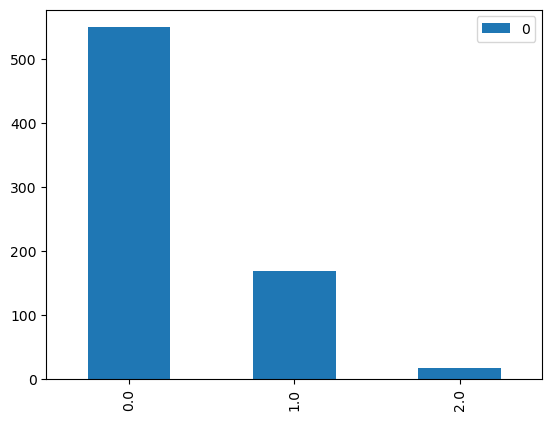

In [86]:
state_counts = Counter(df['Music_effects'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar')

#calculate PCC
num=(df_state[0]/df_state[0].sum())**2
print("Population per class: {}\n".format(df_state))
print("1.25 * Proportion Chance Criterion: {}%".format(1.25*100*num.sum()))

Music Effect Values:

* 0 - Improve
* 1 - No effect
* 2 - Worsen

In [107]:
df = df.drop(df[df['Music_effects'] == 2.0].index)

Population per class:        0
0.0  550
1.0  169

1.25 * Proportion Chance Criterion: 80.04980066194547%


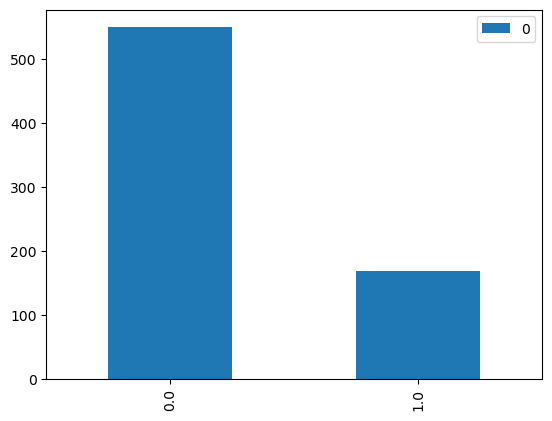

In [108]:
state_counts = Counter(df['Music_effects'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar')

#calculate PCC
num=(df_state[0]/df_state[0].sum())**2
print("Population per class: {}\n".format(df_state))
print("1.25 * Proportion Chance Criterion: {}%".format(1.25*100*num.sum()))

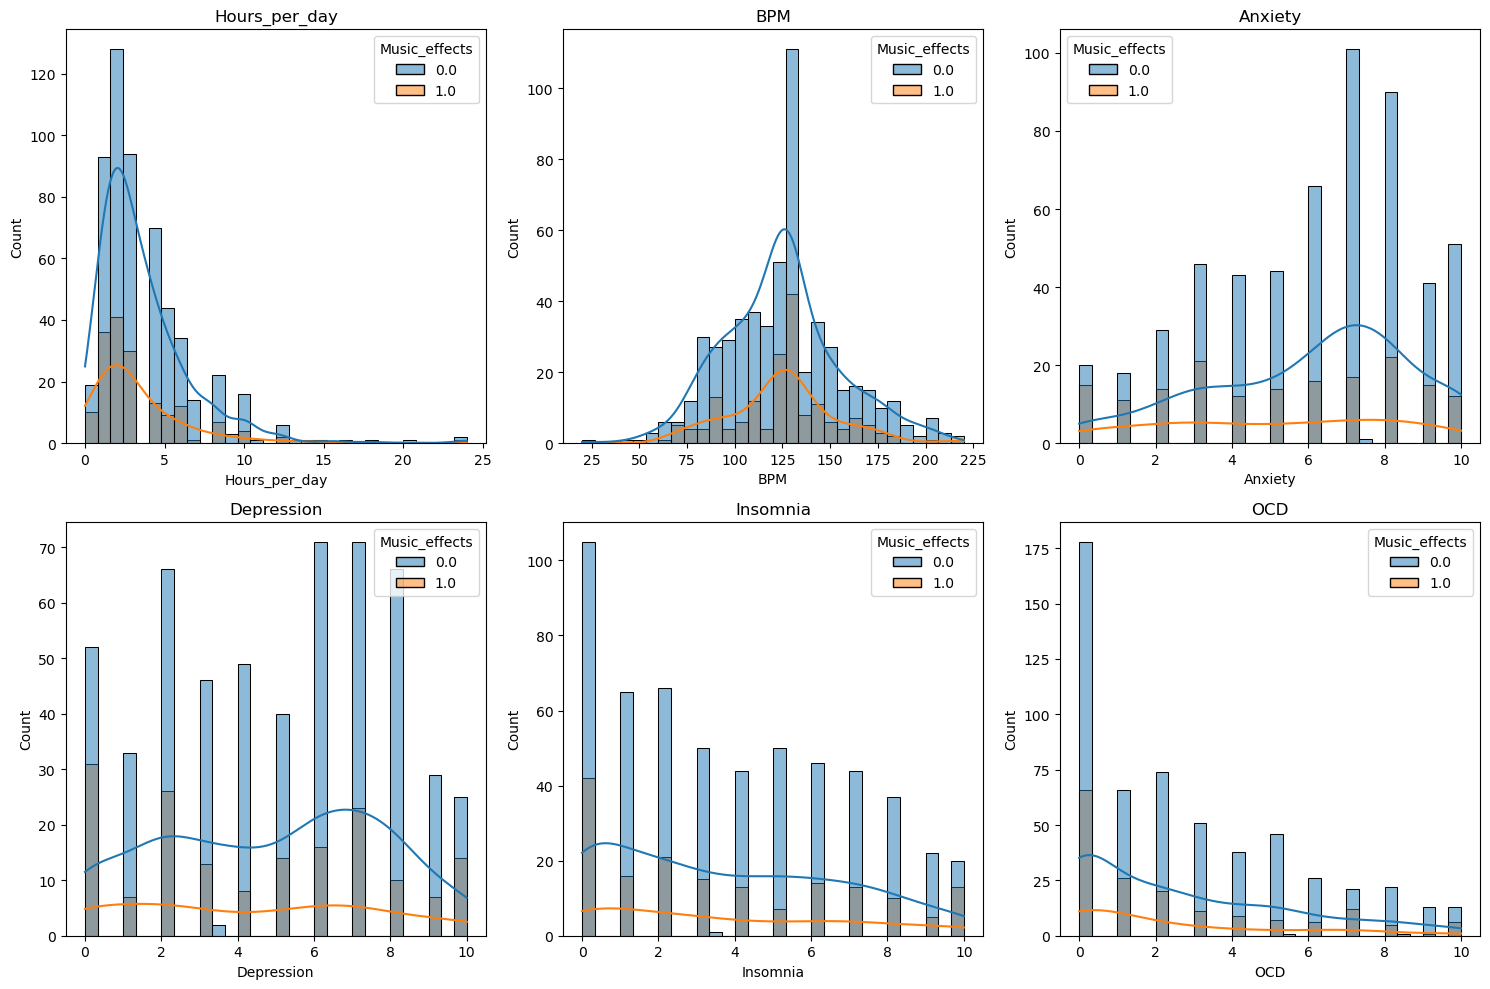

In [109]:
numerical_cols = ['Hours_per_day', 'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD']
hue = 'Music_effects'
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=df, x=col, hue=hue, bins=30, kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

## `🤖 kNN Classification Implementation`

In [112]:
X = df[['Hours_per_day', 'Anxiety', 'Depression', 'Insomnia', 'OCD']]
y = df['Music_effects']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Best Accuracy for kNN: 0.7944444444444444
Best parameter for n_neighbor: 10


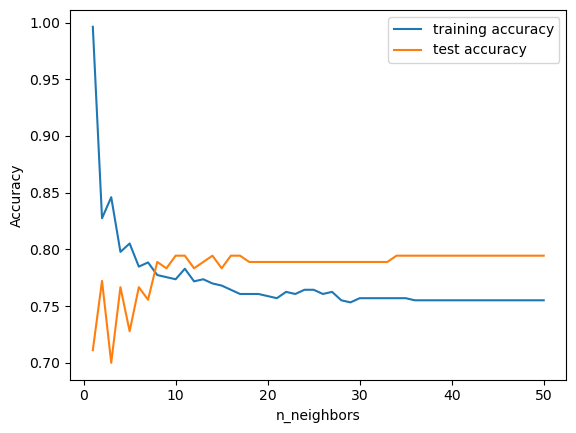

In [113]:
#Classification
knnX_train, knnX_test, knny_train, knny_test = tts(X_scaled, y, test_size=0.25, random_state=143)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 51)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(knnX_train, knny_train)
    # record training set accuracy
    training_accuracy.append(clf.score(knnX_train, knny_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(knnX_test, knny_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

print(f"Best Accuracy for kNN: {np.max(test_accuracy)}")
print(f"Best parameter for n_neighbor: {np.argmax(test_accuracy)+1}")

pass

In [114]:
print("accuracy on training set: %f" % clf.score(knnX_train, knny_train))
print("accuracy on test set: %f" % clf.score(knnX_test, knny_test))

accuracy on training set: 0.755102
accuracy on test set: 0.794444


Best Accuracy for kNN: 0.6956521739130436
Best parameter for n_neighbor: 8


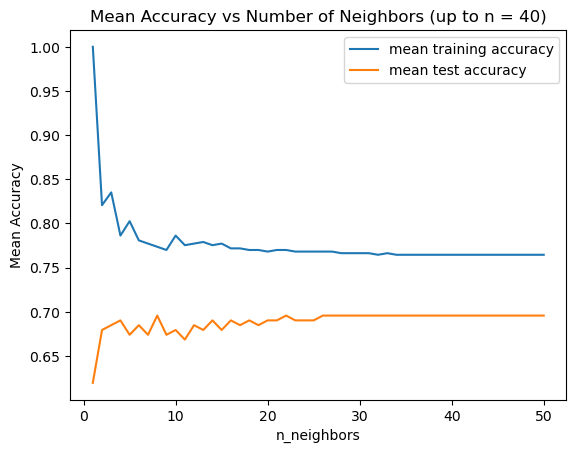

In [19]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 51)

num_trials = range(1, 51)

for n_neighbors in neighbors_settings:

    trial_training_accuracy = []
    trial_test_accuracy = []
    
    for trial_nums in num_trials:
 
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)
        
        clf.fit(knnX_train, knny_train)
        
        trial_training_accuracy.append(clf.score(knnX_train, knny_train))
        
        trial_test_accuracy.append(clf.score(knnX_test, knny_test))
    
    training_accuracy.append(np.mean(trial_training_accuracy))
    test_accuracy.append(np.mean(trial_test_accuracy))
    
plt.plot(neighbors_settings, training_accuracy, label="mean training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="mean test accuracy")
plt.title("Mean Accuracy vs Number of Neighbors (up to n = 50)")
plt.ylabel("Mean Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
print(f"Best Accuracy for kNN: {np.max(test_accuracy)}")
print(f"Best parameter for n_neighbor: {np.argmax(test_accuracy)+1}")

pass

## `🤖 Decision Tree Classifier Implementation`

In [115]:
dtX_train, dtX_test, dty_train, dty_test = tts(X_scaled, y, stratify=y, random_state=42)
tree = DecisionTreeClassifier(random_state=0)

tree.fit(dtX_train, dty_train)

print("accuracy on training set: %f" % tree.score(dtX_train, dty_train))
print("accuracy on test set: %f" % tree.score(dtX_test, dty_test))

accuracy on training set: 0.996289
accuracy on test set: 0.622222


In [116]:
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(dtX_train, dty_train)

print("accuracy on training set: %f" % tree.score(dtX_train, dty_train))
print("accuracy on test set: %f" % tree.score(dtX_test, dty_test))

accuracy on training set: 0.807050
accuracy on test set: 0.761111


Highest Average Test Set Achieved = 0.767845
Best max_depth Parameters = 2


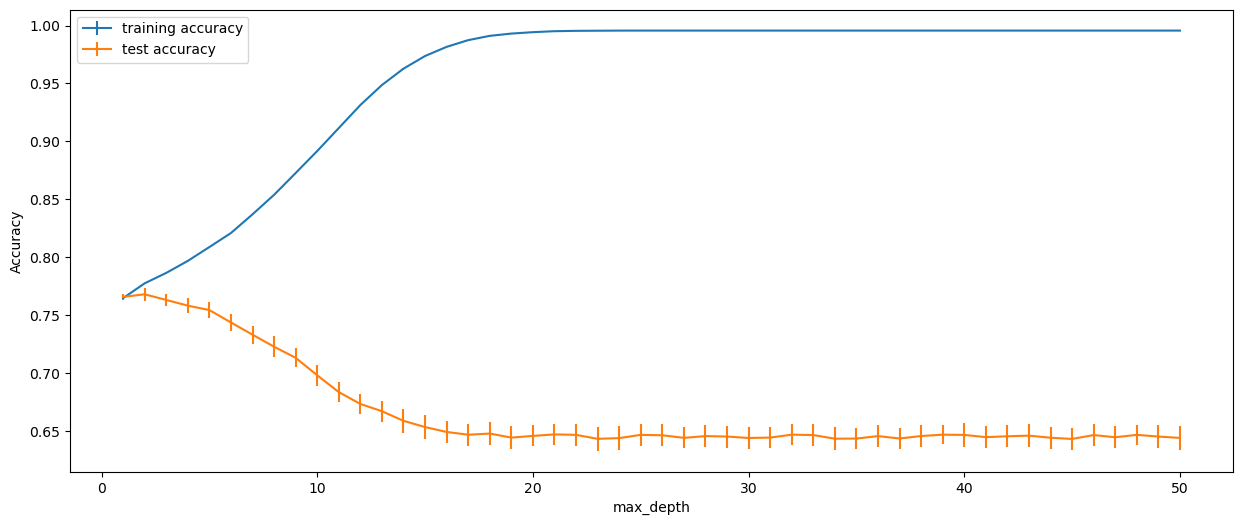

In [117]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,100,1):
    dtcX_train, dtcX_test, dtcy_train, dtcy_test = tts(X_scaled, y, stratify=y, test_size=0.25, random_state=seedN)

    training_accuracy = []
    test_accuracy = []
    maxdepth_settings = range(1, 51)

    for depth in maxdepth_settings:   
        treeC = DecisionTreeClassifier(max_depth=depth)
        treeC.fit(dtcX_train, dtcy_train)

        training_accuracy.append(treeC.score(dtcX_train, dtcy_train))
        test_accuracy.append(treeC.score(dtcX_test, dtcy_test))
    
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy
    
fig = plt.figure(figsize=(15, 6))
plt.errorbar(maxdepth_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.var(axis=1), label="training accuracy")
plt.errorbar(maxdepth_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1)/3, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()
bestdepth=np.argmax(lahat_test.mean(axis=1))+1
print("Highest Average Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best max_depth Parameters = %d" %bestdepth )

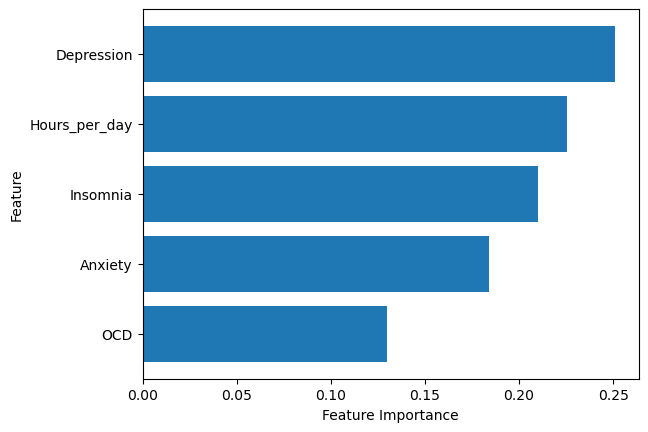

In [118]:
feature_importances = treeC.feature_importances_
sorted_idx = np.argsort(feature_importances)
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

## `🤖 Gradient Boosting Classification Implementation`

Highest Average Test Set Achieved = 0.769444
Best max_depth = 2


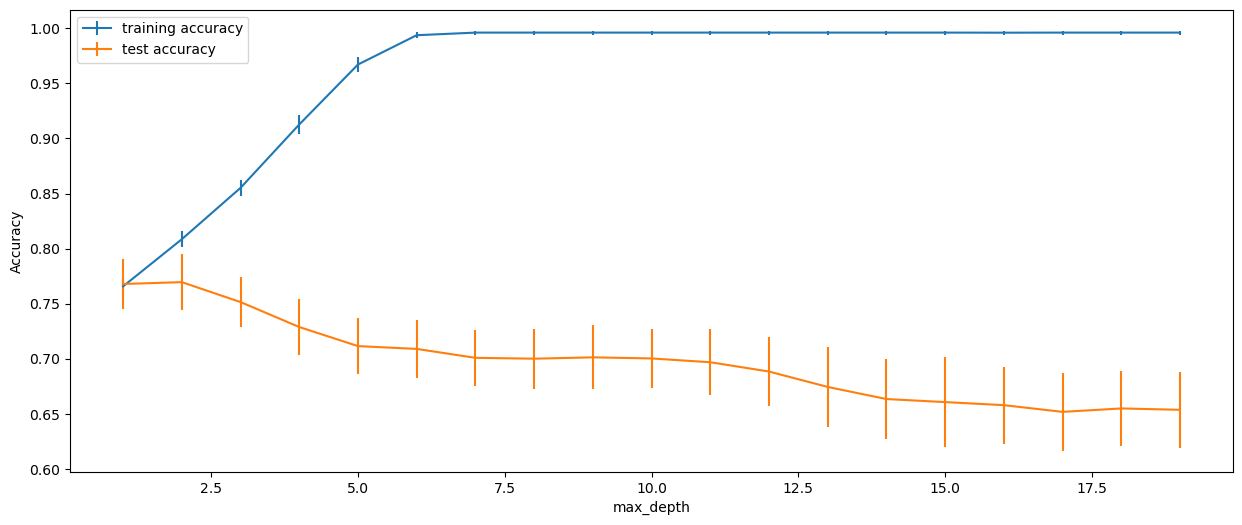

In [119]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()

for seedN in range(1,51,1):
    gbX_train, gbX_test, gby_train, gby_test = tts(X_scaled, y, test_size=0.25, random_state=seedN)
    training_accuracy = []  
    test_accuracy = []
    depth_settings = range(1, 20)

    for depth in depth_settings:   
        forestgb = GradientBoostingClassifier(max_depth=depth, random_state=0, learning_rate=0.1)
        forestgb.fit(gbX_train, gby_train)
        training_accuracy.append(forestgb.score(gbX_train, gby_train)) #
        test_accuracy.append(forestgb.score(gbX_test, gby_test)) 
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy
    
fig = plt.figure(figsize=(15, 6))
plt.errorbar(depth_settings, lahat_training.mean(axis=1),
              yerr=lahat_training.std(axis=1), label="training accuracy")
plt.errorbar(depth_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()
best_nestimator=np.argmax(lahat_test.mean(axis=1))+1
print("Highest Average Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best max_depth = %d" %best_nestimator )

In [120]:
print("accuracy on training set: %f" % forestgb.score(gbX_train, gby_train))
print("accuracy on test set: %f" % forestgb.score(gbX_test, gby_test))

accuracy on training set: 0.996289
accuracy on test set: 0.694444


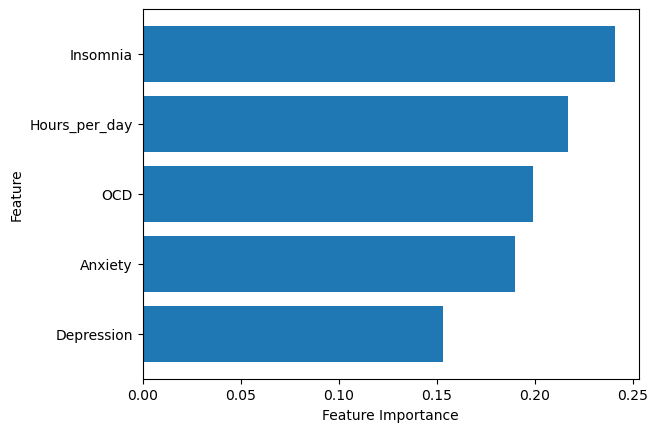

In [121]:
feature_importances = forestgb.feature_importances_
sorted_idx = np.argsort(feature_importances)
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

## `🤖 Random Forest Classification Implementation`

Highest Average Test Set Achieved = 0.771778
Best max_depth = 3


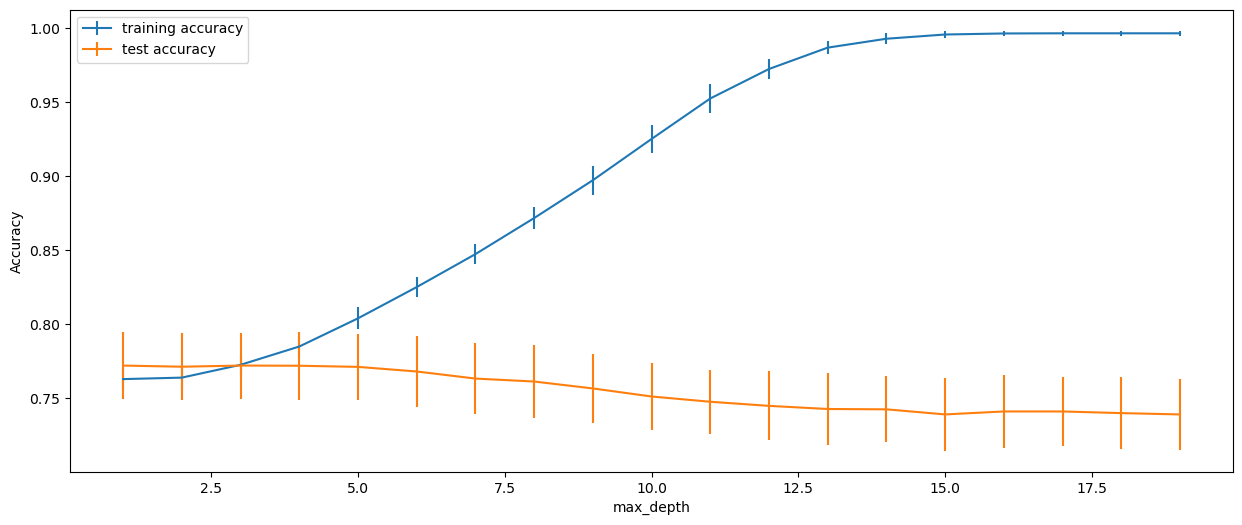

In [122]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()

for seedN in range(1,51,1):
    rfX_train, rfX_test, rfy_train, rfy_test = tts(X_scaled, y, test_size=0.25, random_state=seedN)
    training_accuracy = []  
    test_accuracy = []
    depth_settings = range(1, 20)

    for depth in depth_settings:   
        forestrf = RandomForestClassifier(max_depth=depth, random_state=42)
        forestrf.fit(rfX_train, rfy_train)
        training_accuracy.append(forestrf.score(rfX_train, rfy_train)) #
        test_accuracy.append(forestrf.score(rfX_test, rfy_test)) 
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy
    
fig = plt.figure(figsize=(15, 6))
plt.errorbar(depth_settings, lahat_training.mean(axis=1),
              yerr=lahat_training.std(axis=1), label="training accuracy")
plt.errorbar(depth_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()
best_nestimator=np.argmax(lahat_test.mean(axis=1))+1
print("Highest Average Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best max_depth = %d" %best_nestimator )

In [123]:
print("accuracy on training set: %f" % forestrf.score(rfX_train, rfy_train))
print("accuracy on test set: %f" % forestrf.score(rfX_test, rfy_test))

accuracy on training set: 0.996289
accuracy on test set: 0.733333


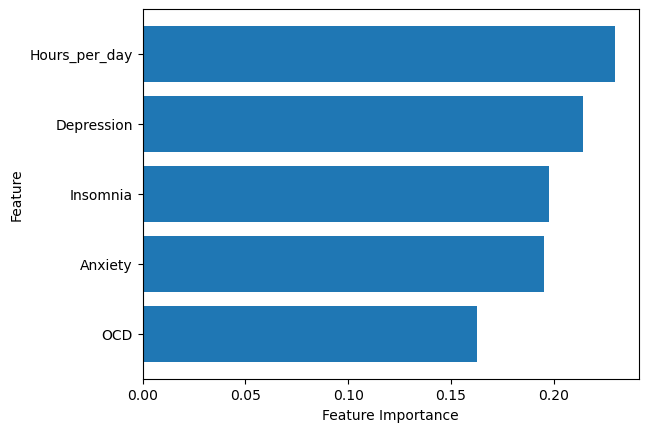

In [124]:
feature_importances = forestrf.feature_importances_
sorted_idx = np.argsort(feature_importances)
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

## `🤖 Multi-Layer Perceptron (MLP) Implementation`

In [98]:
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = tts(X_scaled, y, test_size=0.25, random_state=143)

MLP = MLPClassifier(max_iter=1000)
MLP.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.6956521739130435


In [99]:
print("accuracy on training set: %f" % MLP.score(X_train, y_train))
print("accuracy on test set: %f" % MLP.score(X_test, y_test))

accuracy on training set: 0.806159
accuracy on test set: 0.684783


## `🤖 Naive Bayes Implementation`

In [100]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

print("accuracy on training set: %f" % nb.score(X_train, y_train))
print("accuracy on test set: %f" % nb.score(X_test, y_test))

# Predictions
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

accuracy on training set: 0.760870
accuracy on test set: 0.695652
Accuracy: 0.6956521739130435


## `🤖 Support Vector Machine (SVM) Implementation`

In [101]:
from sklearn.svm import SVC

# SVM model
svc = SVC()
svc.fit(X_train, y_train)

print("accuracy on training set: %f" % svc.score(X_train, y_train))
print("accuracy on test set: %f" % svc.score(X_test, y_test))

# Predictions
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

accuracy on training set: 0.766304
accuracy on test set: 0.695652
Accuracy: 0.6956521739130435


## 📈 Model Predictions For Classification Models

In [41]:
knnCf = clf.predict(knnX_test)
Dt = tree.predict(dtX_test)

knnCf_pred_proba = clf.predict_proba(knnX_test)[:, 1]

print(f'knn classification predictions: ', knnCf)
print(f'Decision Tree predictions: ', Dt)

knn classification predictions:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Decision Tree predictions:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 

## `🤖 SHAP (SHapley Additive exPlanations) Implementation`

Using 539 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/180 [00:00<?, ?it/s]

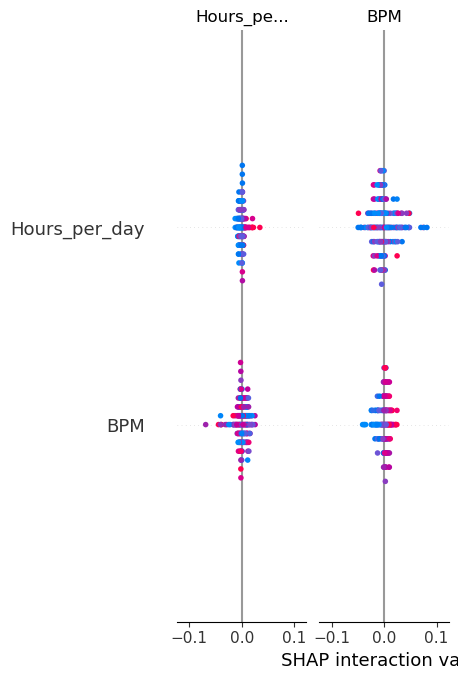

In [42]:
explainer = shap.KernelExplainer(clf.predict_proba, knnX_train)

shap_values = explainer.shap_values(knnX_test)

shap.summary_plot(shap_values, knnX_test, feature_names=X.columns)

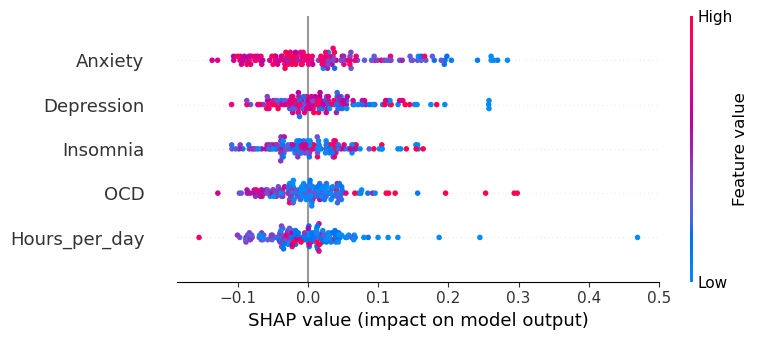

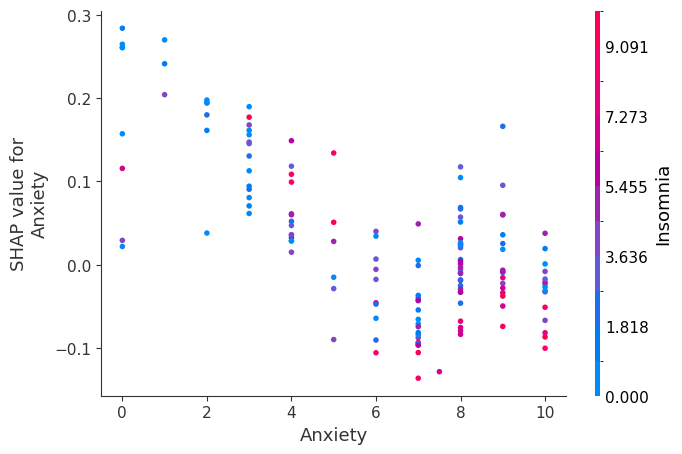

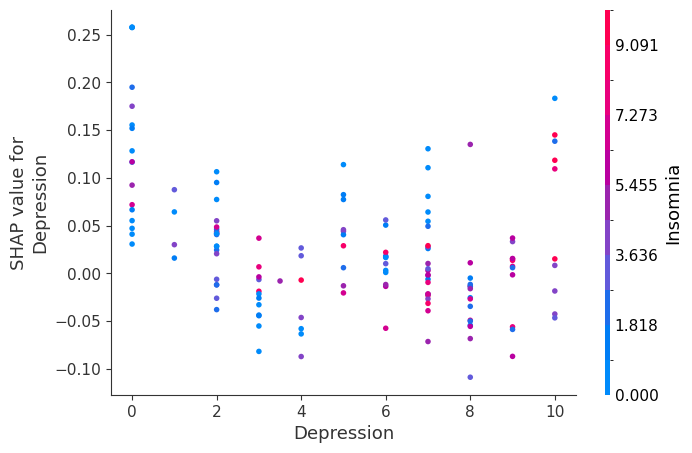

In [125]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Initialize the SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Dependence plot for a specific feature
shap.dependence_plot("Anxiety", shap_values.values, X_test, feature_names=X.columns)

shap.dependence_plot("Depression", shap_values.values, X_test, feature_names=X.columns)


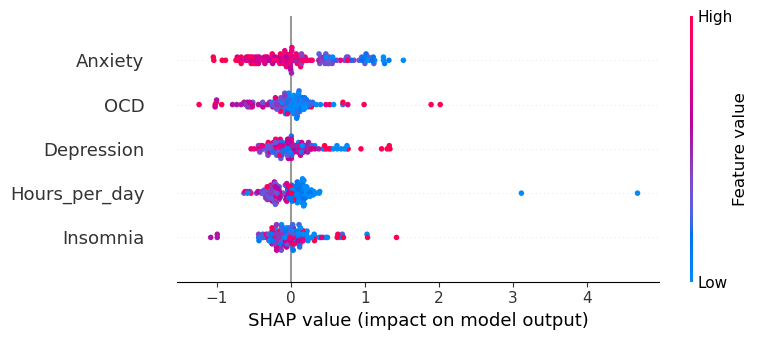

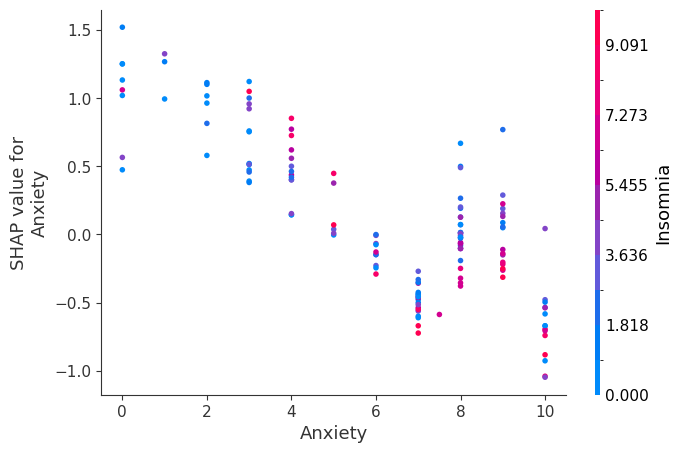

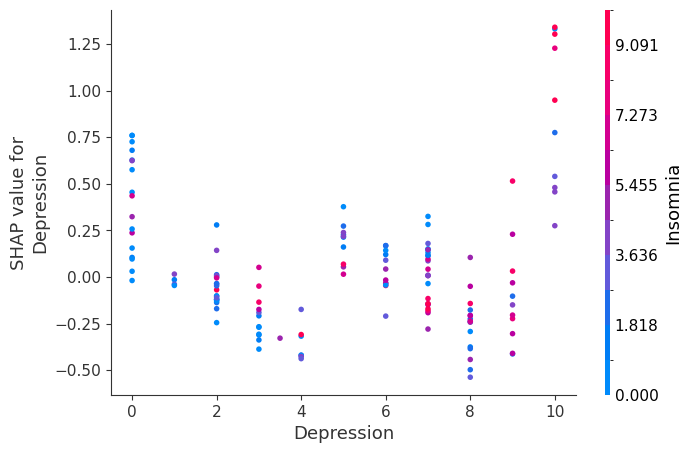

In [126]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)


model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Initialize the SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Dependence plot for a specific feature
shap.dependence_plot("Anxiety", shap_values.values, X_test, feature_names=X.columns)

shap.dependence_plot("Depression", shap_values.values, X_test, feature_names=X.columns)

## 📈Calculate ROC-AUC score for Classification models

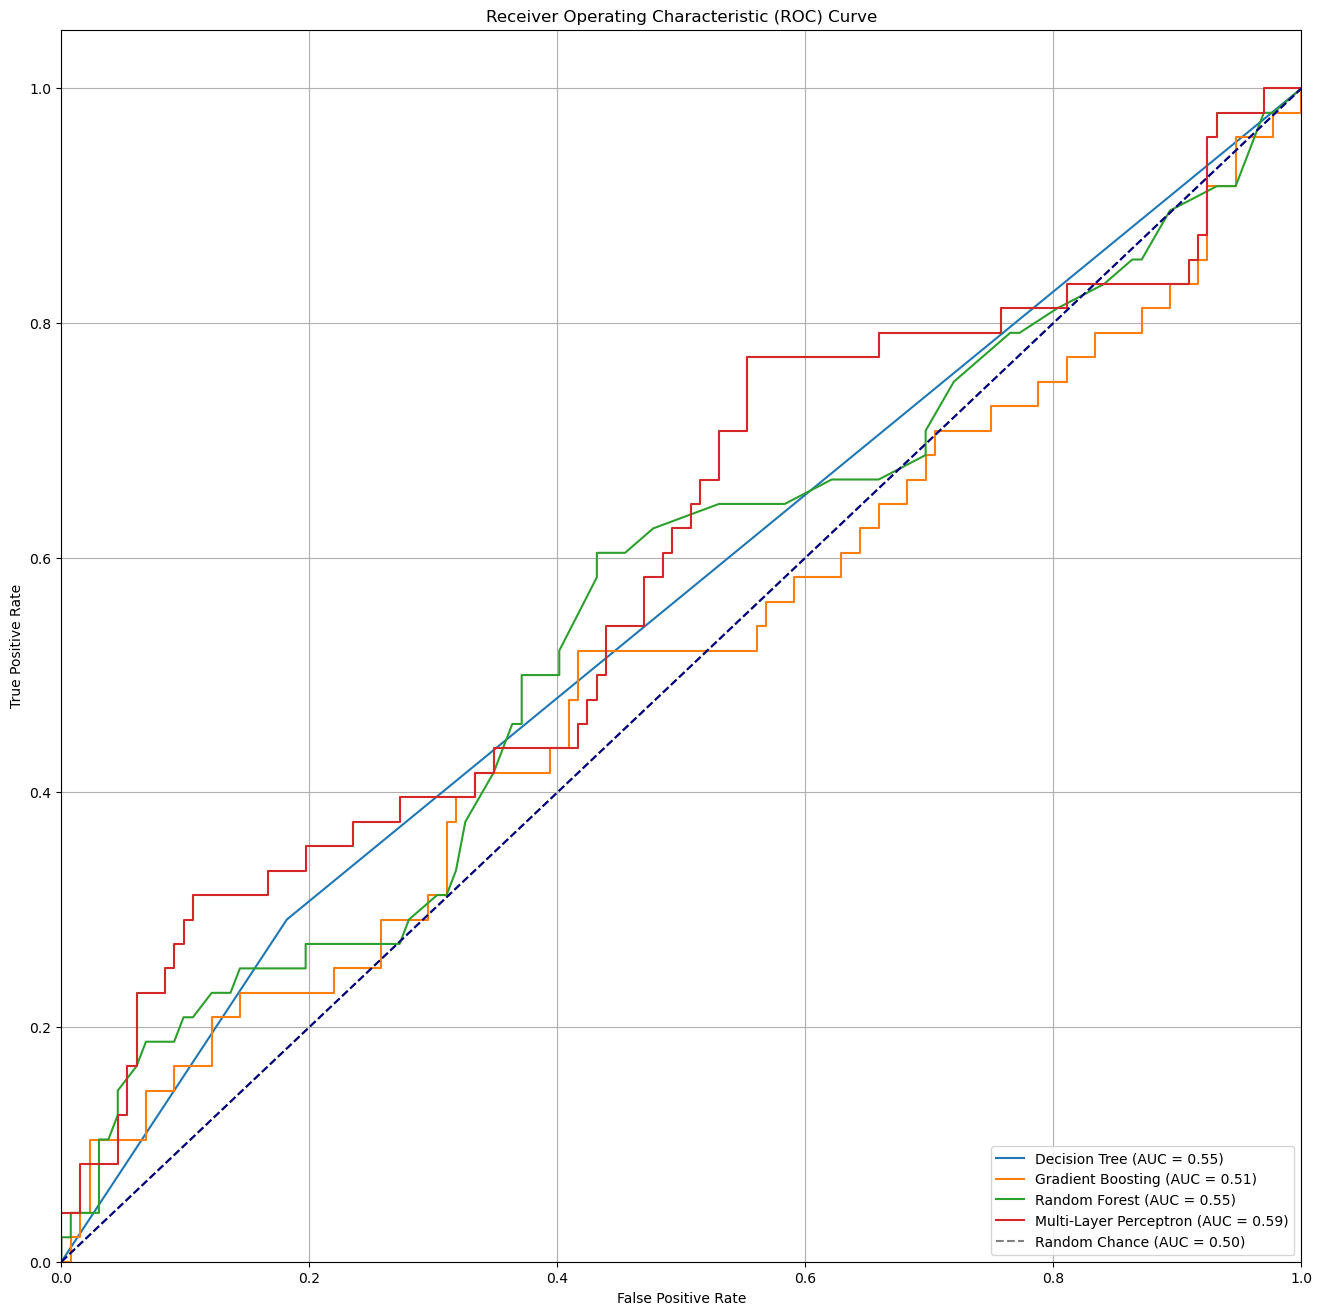

In [127]:
X_train, X_test, y_train, y_test = tts(X_scaled, y, test_size=0.25, random_state=0)

classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Gradient Boosting': GradientBoostingClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0),
    'Multi-Layer Perceptron': MLPClassifier(random_state=0)
    
}

y_random = [0] * len(y_test)
plt.figure(figsize=(16, 16))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_score = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

fpr_random, tpr_random, _ = roc_curve(y_test, y_random)
roc_auc_random = auc(fpr_random, tpr_random)
plt.plot(fpr_random, tpr_random, linestyle='--', color='gray', label=f'Random Chance (AUC = {roc_auc_random:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()